# Laboratorio 1: Regresión en California

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "California Housing dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import fetch_california_housing
X_california, y_california = fetch_california_housing(return_X_y=True, as_frame=True)
california = fetch_california_housing()
target_feature = "MedHouseVal"

In [3]:
# check data types and count nulls 
#print(X_california.dtypes)
X_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [4]:
y_california.describe() # Average target_feature in $100,000

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

In [5]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
# Remove rows that have atleast one row that deviates more than 3 standard deviations from the mean

# Calculate the mean and standard deviation of each column
mean = X_california.mean(axis=0)
std = X_california.std(axis=0)

# Calculate the z-score for each element in the matrix
z = (X_california - mean) / std

# Find the location of all elements that are more than 3 standard deviations away
outliers = (np.abs(z) > 3).any(axis=1)


# check data shape before removing outliers

print(X_california.shape)
print(y_california.shape)

# Remove the corresponding rows from X and y

X_california = X_california[~outliers]
y_california = y_california[~outliers]

# check data shape

print(X_california.shape)
print(y_california.shape)

# Replace california['data'] and california['feature_names'] with X_california and y_california

california['data'] = X_california.to_numpy()
california['target'] = y_california.to_numpy()

# check data shape

print(california['data'].shape)
print(california['target'].shape)


(20640, 8)
(20640,)
(19794, 8)
(19794,)
(19794, 8)
(19794,)


In [7]:

print(california['DESCR'])  # descripción del dataset
#california['feature_names'] # nombres de los atributos para cada columna de 'data'
#california['data']           # matriz con los datos de entrada (atributos)
#print(california['target']) # vector de valores a predecir
#california

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [8]:
california['data'].shape, california['target'].shape

((19794, 8), (19794,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [9]:
from sklearn.model_selection import train_test_split
X, y = california['data'], california['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((15835, 8), (3959, 8))

In [10]:
y.shape

(19794,)

In [11]:
y_test.shape

(3959,)

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

**Responder todas las preguntas acá.**
1. El conjunto de datos California Housing procede del Censo de EE.UU. de 1990. Contiene información sobre las condiciones de vivienda en diferentes grupos de bloques de viviendas de California.

Un **grupo de bloques** es la unidad geográfica más pequeña para la que la Oficina del Censo de EE.UU. publica datos.

2. La variable objetivo que debe predecirse es la mediana de los precios de las viviendas en los grupos de bloques. Se expresa en cientos de miles de dólares (100.000 $). Representa el punto de precio en el que la mitad de las casas se valoran por encima de él y la otra mitad por debajo.

3. Posee 20.640 registros con 8 atributos numéricos:

  - ingreso medio
  - la edad de la casa
  - el promedio de habitaciones
  - el promedio de dormitorios por hogar
  - cantidad de habitantes en el bloque
  - el promedio de miembros del hogar
  - la latitud y la longitud de cada grupo de bloques.

4. Probablemente los atributos más determinantes sean:
    - **ingreso medio:** si hay un ingreso medio alto en el bloque, es probablemente un lugar donde gente con muchos recursos eligen vivir y gente con muchos recursos suelen vivir en lugares caros y análogamente con ingresos medio bajo.
    - **promedio de habitaciones:** las casas con más habitaciones, siendo todas las demás variables iguales, suelen ser más caras que casas con menos habitaciones.
    - **edad de la casa:** probablemente las casas viejas tengan una valuación menor que las nuevas
 
5. Sí, hay que tener en cuenta las siguientes cuestiones

- Los datos son de 1990, y las cosas pueden haber cambiado considerablemente en california desde entonces.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

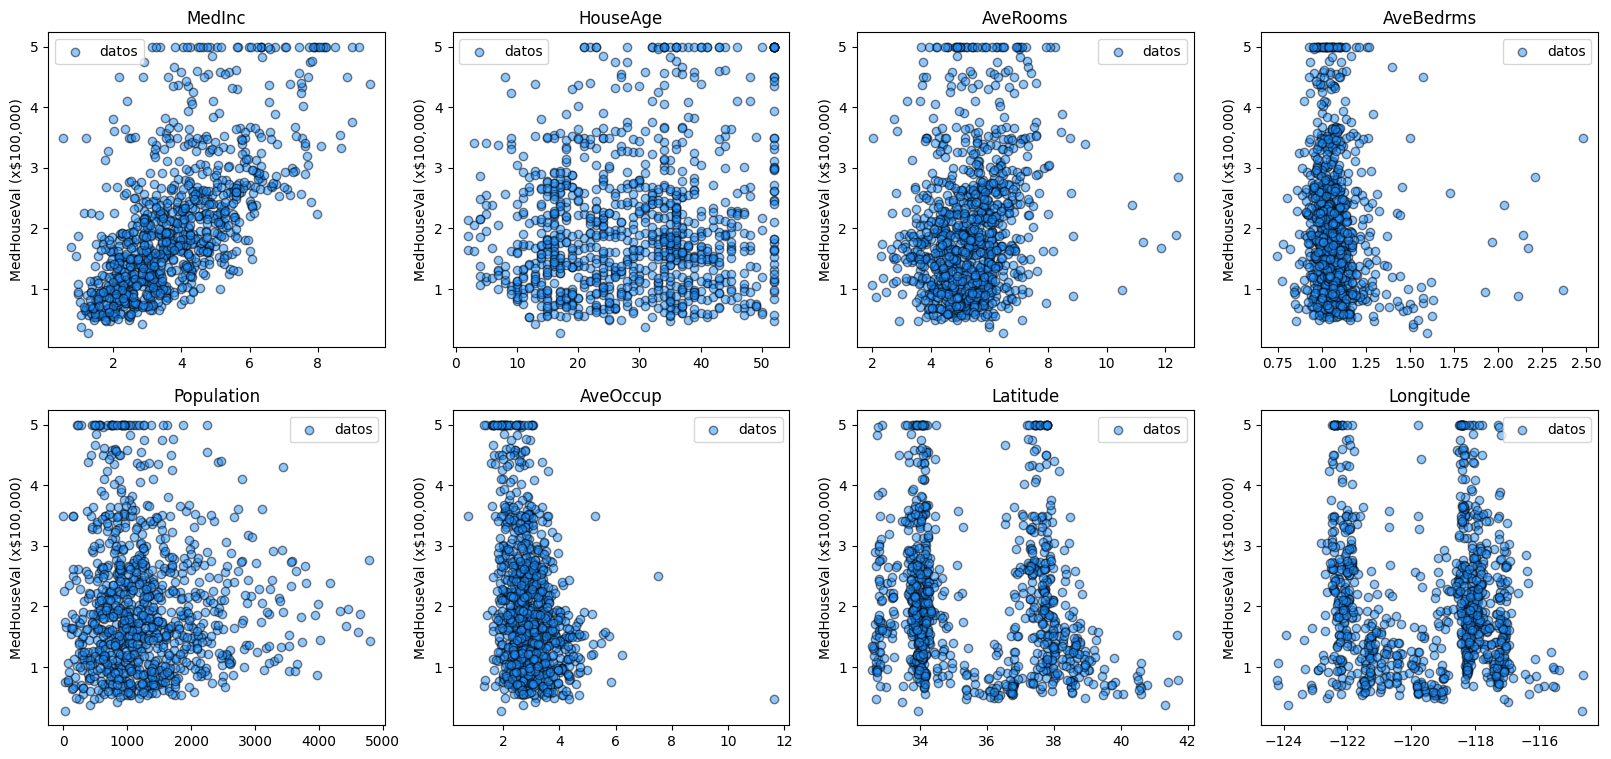

In [30]:
# 1
"""
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude
"""

fig, axes = plt.subplots(2, 4, figsize=(20, 9))
X_california_plot = X_california.sample(1000, random_state=0)
y_california_plot = y_california.sample(1000, random_state=0)

for i, ax in enumerate(axes.ravel()):
    feature = X_california_plot.columns[i]
    ax.scatter(X_california_plot[feature], y_california_plot, facecolor="dodgerblue", edgecolor="k", label="datos", alpha=0.5)
    ax.set_title(feature)
    ax.set_ylabel(f"{target_feature} (x$100,000)")
    ax.legend()
plt.show()

## 2 y 3
<!--
1. MedInc parece ser buen predictor
2. un poco menos pero aún util, parece ser AveOccup
3. si bien definitivamente no se correlacionan linealmente con el precio, Latitude y Longitude parecen aportar información que median income no tiene
--> 
Podemos observar que los atributos que parecen ser buenos predictores importancia son `MedInc` y `AveRooms`recordemos que se conresponden con el ingreso medio del bloque y el promedio de habitaciones por hogar. Si bien no se correlacionan linelamente con el atributo que queremos predecir, `Latitude` y `Longitude` parecen aportar información que `MedInc` no refleja. 

<Axes: >

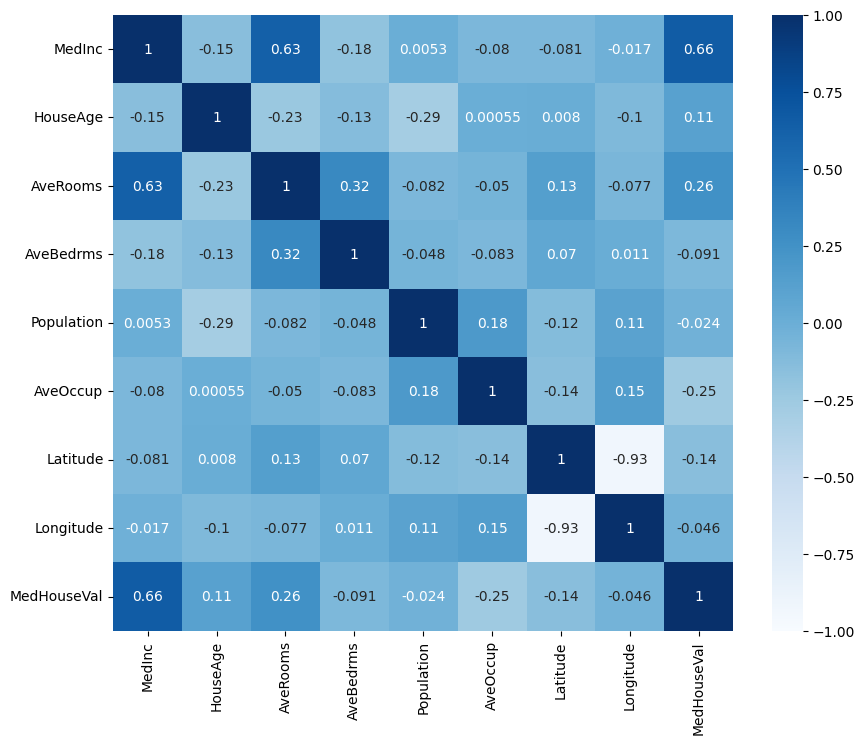

In [31]:
# Matriz de correlación

df_with_target = X_california.copy()
df_with_target[target_feature] = y_california
corr = df_with_target.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="Blues", vmin=-1, vmax=1, ax=ax)

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [76]:
# 1. Resolver acá. Ayuda:
feature = 'MedInc'
selector = california['feature_names'].index(feature)


X_train_f = X_train[:, selector] # selecciona la columna 'MedInc' de X_train
X_test_f = X_test[:, selector]  # selecciona la columna 'MedInc' de X_test
X_train_f.shape, X_test_f.shape

((15835,), (3959,))

In [78]:
# 2. Instanciar y entrenar acá.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_f.reshape(-1, 1), y_train) # reshape(-1, 1) convierte un vector fila en un vector columna



LinearRegression()

In [79]:
# 3. Predecir y evaluar acá.

from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_f.reshape(-1, 1))
test_error = mean_squared_error(y_test, y_pred)

print(f"Test error: {test_error:.4f} x$100,000")


Test error: 0.7086 x$100,000


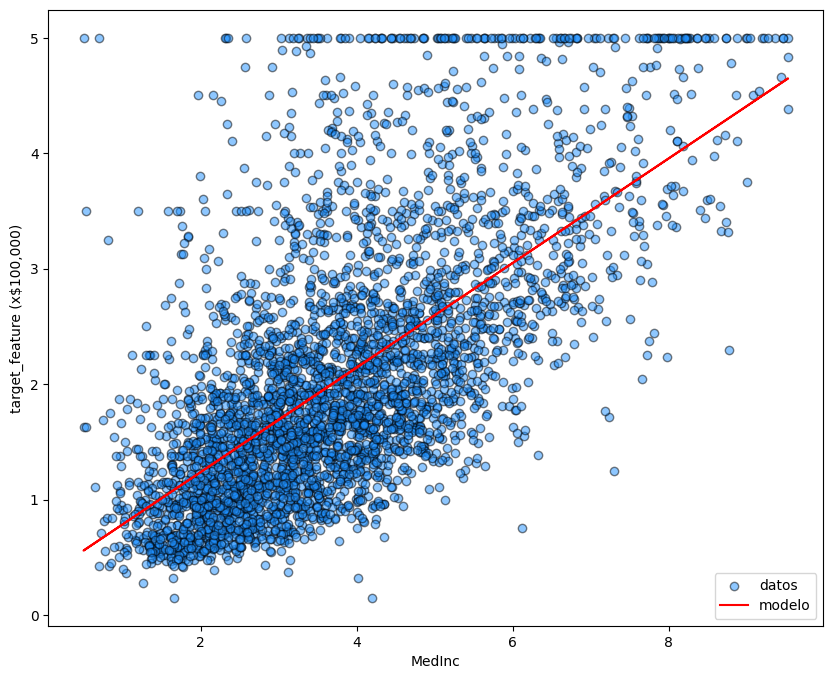

In [80]:
# 4. Graficar acá. Ayuda:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(X_test_f, y_test, facecolor="dodgerblue", edgecolor="k", label="datos", alpha=0.5)
ax.plot(X_test_f, y_pred, color="red", label="modelo")
ax.set_xlabel(feature)
ax.set_ylabel(f"target_feature (x$100,000)")
ax.legend()
plt.show()

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [81]:
# 1. Resolver acá.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degrees = range(2, 25)
train_errors = []
test_errors = []

for degree in degrees:
    model_pol = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model_pol.fit(X_train_f.reshape(-1, 1), y_train)
    
    y_train_pred = model_pol.predict(X_train_f.reshape(-1, 1))
    y_test_pred = model_pol.predict(X_test_f.reshape(-1, 1))

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)
    print(f"Degree: {degree}, train error: {train_error:.4f}, test error: {test_error:.4f}")


Degree: 2, train error: 0.6893, test error: 0.7062
Degree: 3, train error: 0.6891, test error: 0.7057
Degree: 4, train error: 0.6886, test error: 0.7051
Degree: 5, train error: 0.6857, test error: 0.7028
Degree: 6, train error: 0.6842, test error: 0.7006
Degree: 7, train error: 0.6842, test error: 0.7011
Degree: 8, train error: 0.6841, test error: 0.7015
Degree: 9, train error: 0.6841, test error: 0.7015
Degree: 10, train error: 0.6840, test error: 0.7018
Degree: 11, train error: 0.6839, test error: 0.7023
Degree: 12, train error: 0.6839, test error: 0.7023
Degree: 13, train error: 0.6839, test error: 0.7023
Degree: 14, train error: 0.6838, test error: 0.7022
Degree: 15, train error: 0.6839, test error: 0.7019
Degree: 16, train error: 0.6843, test error: 0.7030
Degree: 17, train error: 0.6850, test error: 0.7033
Degree: 18, train error: 0.6853, test error: 0.7035
Degree: 19, train error: 0.6861, test error: 0.7043
Degree: 20, train error: 0.6880, test error: 0.7066
Degree: 21, train er

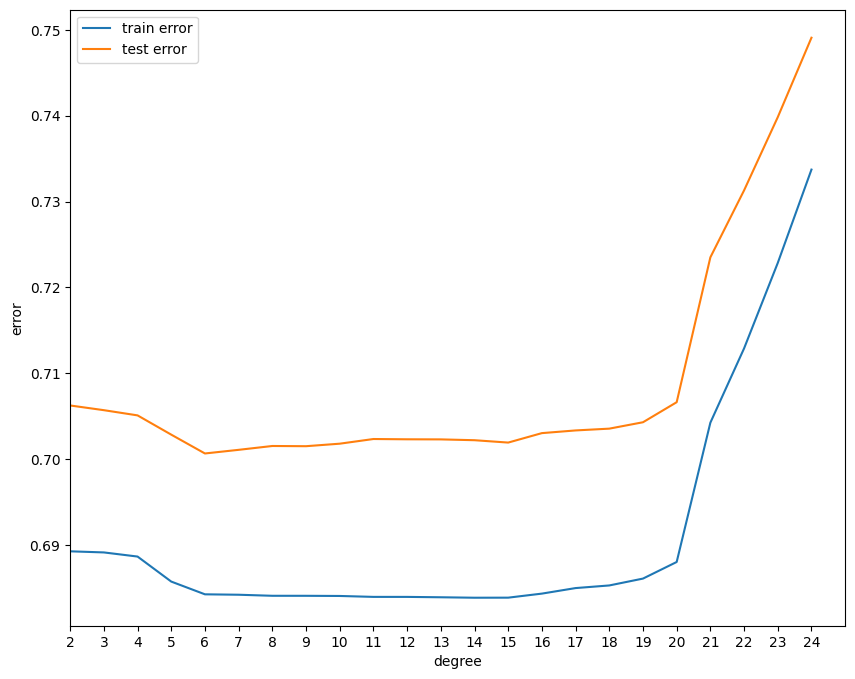

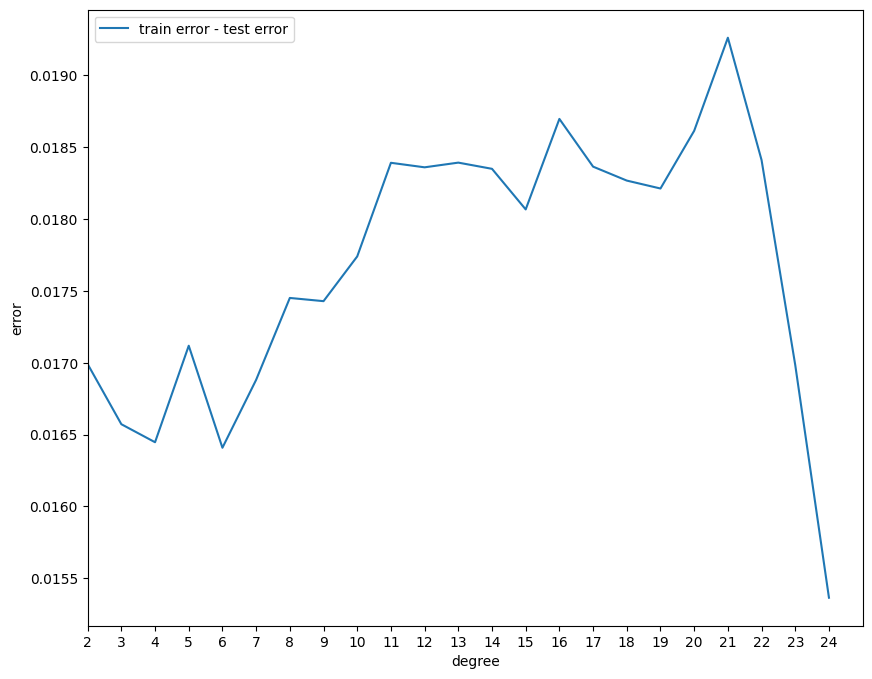

In [82]:
# 2. Graficar curvas de error acá.

fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(degrees, train_errors, label="train error")
ax.plot(degrees, test_errors, label="test error")
ax.set_xlabel("degree")
ax.set_ylabel("error")
ax.set_xlim(2, 25)
ax.set_xticks(range(2, 25, 1))
ax.legend()
plt.show()

# Diferencial de error entre train y test por cada grado de polinomio

diff_errors = np.abs(np.array(train_errors) - np.array(test_errors))
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(degrees, diff_errors, label="train error - test error")
ax.set_xlabel("degree")
ax.set_ylabel("error")
ax.set_xlim(2, 25)
ax.set_xticks(range(2, 25, 1))
ax.legend()
plt.show()

**3. Responder acá**

El error que se obtiene en el conjunto de datos de testing no difiere mucho del error obtenido en el conjunto de datos de entrenamiento,por lo que no se puede decir que el modelo esté sobreajustado. Sin embargo, el error obtenido es bastante alto, por lo que se puede decir que el modelo en general no es muy bueno y empeora notablemente a partir del grado 21.

In [83]:
test_errors.index(min(test_errors))+2


6

Degree: 6, train error: 0.6842, test error: 0.7006


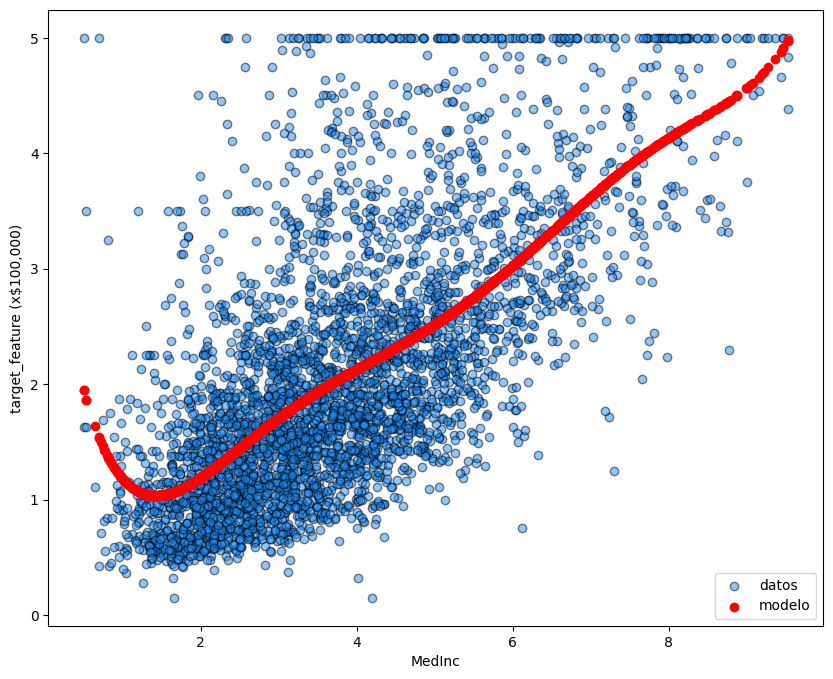

In [62]:
# 4. Reconstruir mejor modelo acá y graficar.
# El mejor polinomio es el de grado 6, graficar ese polinomio

degree = 6
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f.reshape(-1, 1), y_train)

y_train_pred = model.predict(X_train_f.reshape(-1, 1))
y_test_pred = model.predict(X_test_f.reshape(-1, 1))

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f"Degree: {degree}, train error: {train_error:.4f}, test error: {test_error:.4f}")

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(X_test_f, y_test, facecolor="dodgerblue", edgecolor="k", label="datos", alpha=0.5)
ax.scatter(X_test_f, y_test_pred, color="red", label="modelo")
ax.set_xlabel(feature)
ax.set_ylabel(f"target_feature (x$100,000)")
ax.legend()
plt.show()

Podemos ver que se reduce el error cambiando de un regresor lineal a uno polinomial. 

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

### Regresor lineal

In [63]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (np.array(california['feature_names']) == 'MedInc') | (np.array(california['feature_names']) == 'AveRooms')

X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((15835, 2), (3959, 2))

In [64]:
y_train.shape

(15835,)

In [65]:
X_test_fs[8]

array([5.5629    , 5.45481928])

In [66]:
# 2. Instanciar y entrenar acá.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_fs, y_train)

LinearRegression()

In [67]:
# 3. Predecir y evaluar acá.

from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_fs)
test_error = mean_squared_error(y_test, y_pred)

print(f"Test error: {test_error:.4f} x$100,000")

Test error: 0.6572 x$100,000


## Regresor ponomial

In [84]:
# 1. Resolver acá.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degrees = range(2,25)
train_errors = []
test_errors = []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_fs, y_train)
    
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)
    print(f"Degree: {degree}, train error: {train_error:.4f}, test error: {test_error:.4f}")

Degree: 2, train error: 0.6226, test error: 0.6410
Degree: 3, train error: 0.6199, test error: 0.6378
Degree: 4, train error: 0.6131, test error: 0.6306
Degree: 5, train error: 0.6097, test error: 0.6251
Degree: 6, train error: 0.6073, test error: 0.6242
Degree: 7, train error: 0.6053, test error: 0.6227
Degree: 8, train error: 0.6027, test error: 0.6252
Degree: 9, train error: 0.6015, test error: 0.6269
Degree: 10, train error: 0.6005, test error: 0.6251
Degree: 11, train error: 0.6000, test error: 0.6324
Degree: 12, train error: 0.5996, test error: 0.6486
Degree: 13, train error: 0.5984, test error: 0.6416
Degree: 14, train error: 0.5984, test error: 0.6757
Degree: 15, train error: 0.5984, test error: 0.7322
Degree: 16, train error: 0.5985, test error: 0.8091
Degree: 17, train error: 0.6115, test error: 0.9066
Degree: 18, train error: 0.6793, test error: 4.2553
Degree: 19, train error: 0.9141, test error: 5.9855
Degree: 20, train error: 0.6821, test error: 4.9578
Degree: 21, train er

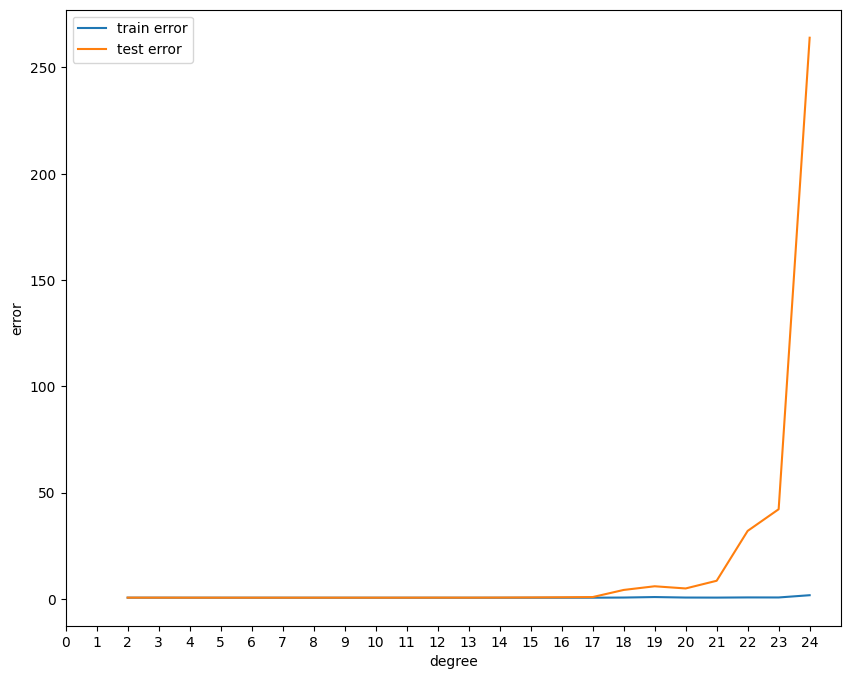

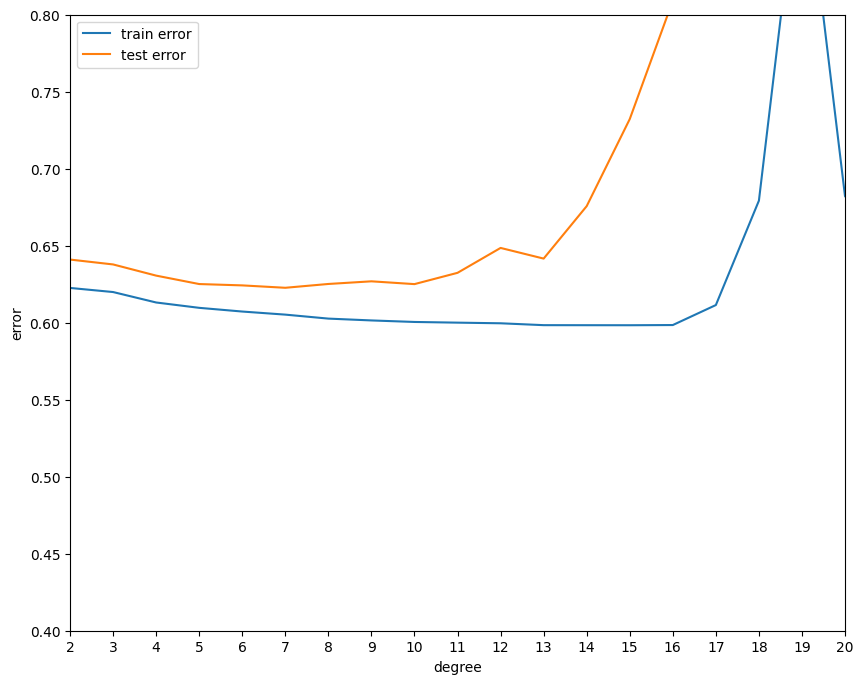

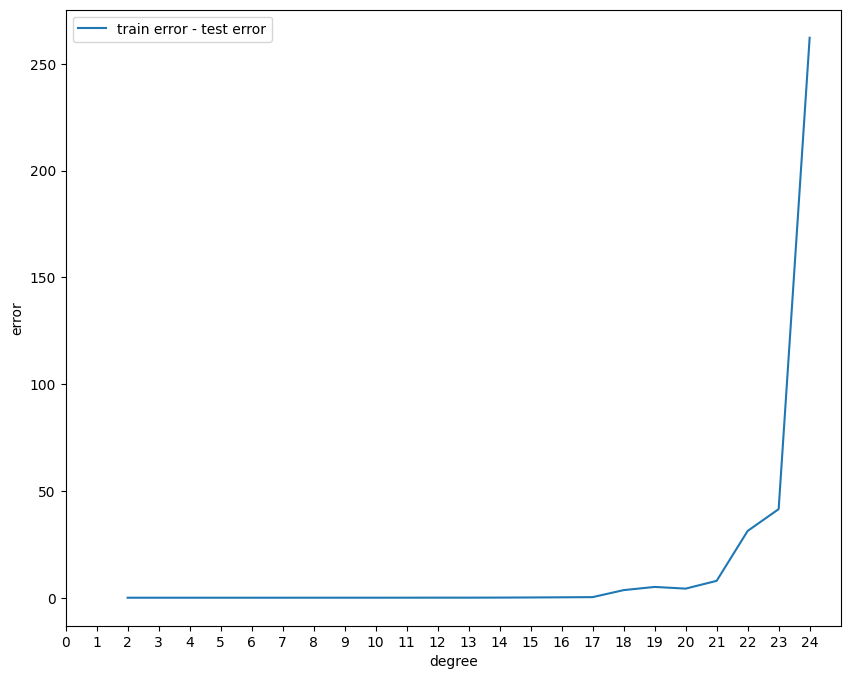

In [85]:
# 2. Graficar curvas de error acá.
#hay que arreglar este grafico
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(degrees, train_errors, label="train error")
ax.plot(degrees, test_errors, label="test error")
ax.set_xlabel("degree")
ax.set_ylabel("error")
ax.set_xlim(0, 25)
ax.set_xticks(range(0, 25, 1))
ax.legend()
plt.show()


fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(degrees, train_errors, label="train error")
ax.plot(degrees, test_errors, label="test error")
ax.set_xlabel("degree")
ax.set_ylabel("error")
ax.set_xlim(2, 10)
ax.set_xticks(range(2, 25, 1))
plt.xlim(2,20)
plt.ylim(0.4,0.8)
ax.legend()
plt.show() 


# Diferencial de error entre train y test por cada grado de polinomio

diff_errors = np.abs(np.array(train_errors) - np.array(test_errors))
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(degrees, diff_errors, label="train error - test error")
ax.set_xlabel("degree")
ax.set_ylabel("error")
ax.set_xlim(0, 25)
ax.set_xticks(range(0, 25, 1))
ax.legend()
plt.show()

In [86]:
test_errors.index(min(test_errors))+2

7

In [89]:
# 4. Reconstruir mejor modelo acá y graficar.

# El mejor polinomio es el de grado 7, graficar ese polinomio

degree = 7
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_fs, y_train)

y_train_pred = model.predict(X_train_fs)
y_test_pred = model.predict(X_test_fs)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f"Degree: {degree}, train error: {train_error:.4f}, test error: {test_error:.4f}")


Degree: 7, train error: 0.6053, test error: 0.6227


Cambiando el modelo de regresión lineal a una regresión polinomial y agregar el atributo `AveRooms`, obtuvimos una reducción mayor del error.

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
